## Feature Selection

In [72]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# find duplicate rows and columns

In [73]:
df=pd.read_csv('../Krish Fe/mobile_dataset.csv')

In [74]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [75]:
df.shape

(2000, 21)

In [76]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Univariate Selection

In [77]:
X=df.drop(labels=['price_range'], axis=1)
y=df['price_range']

### SelectKBest Algorithm

In [78]:
def kBest(number):
    ordered_rank_features = SelectKBest(score_func=chi2)
    ordered_feature = ordered_rank_features.fit(X, y)

    dfscores = pd.DataFrame(ordered_feature.scores_, columns=["Score"])
    dfcolumns = pd.DataFrame(X.columns)

    features_rank = pd.concat([dfcolumns, dfscores], axis=1)
    features_rank.columns = ['Features', 'Score']
    return features_rank.sort_values(by=['Score'], ascending=False).head(number)


kBest(10)


,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


### Feature Importance

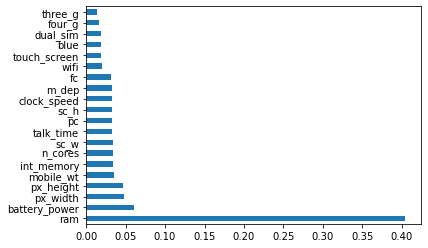

In [79]:
def ETC(number):
    model = ExtraTreesClassifier()
    model.fit(X, y)
    ranked_features = pd.Series(model.feature_importances_, index=X.columns)
    ranked_features.nlargest(number).plot(kind='barh')
    plt.show()

ETC(20)

### Correlation
- This is to check which features are highly correlated, so that we can remove the highly correlated features

<AxesSubplot:>

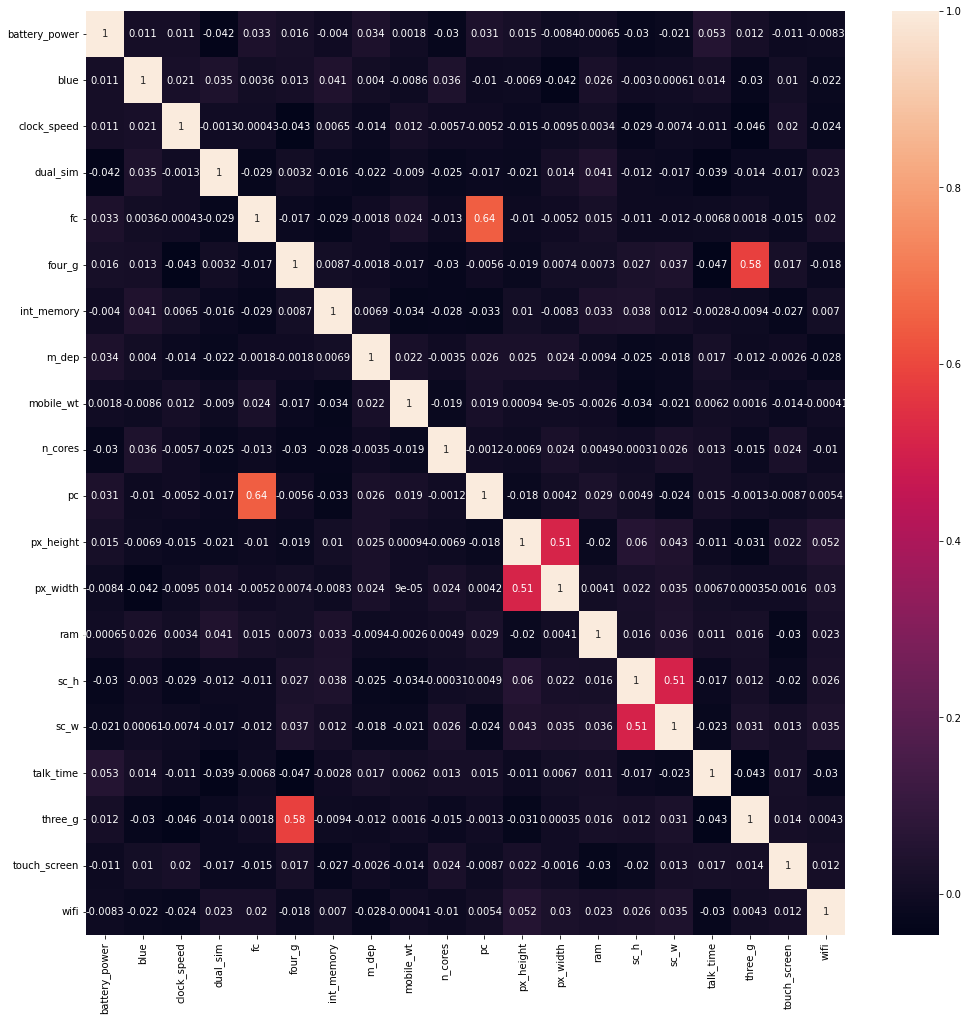

In [80]:
def correlationMap():

    corr=df.drop(labels=['price_range'], axis=1).corr()
    top_features=corr.index
    plt.figure(figsize=(17,17))
    return sns.heatmap(df[top_features].corr(),annot=True)

correlationMap()

### This function give's which of the features are highly correlated.


In [81]:
# This function give's which of the features are highly correlated.

def correlation_2(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # we are interested in absolute coeff value
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)

    return col_corr


correlation_2(df.drop(labels=['price_range'], axis=1), 0.5)


{'pc', 'px_width', 'sc_w', 'three_g'}

In [82]:
mutual_info_classif()

21